## LAB Assignment 4 - Linear Regression

12011404, 叶璨铭
本次实验建立模型预测房价。
### 4.1 Before Assignment
#### 4.1.1 Load dataset & Import the required libraries
我们用sklearn自带的波士顿房价数据集，用于预测房价。

In [45]:
import warnings
from sklearn import datasets
warnings.filterwarnings('ignore')
boston = datasets.load_boston()
warnings.filterwarnings('default') # 仅仅忽略boston的警告。
print(dir(boston), type(boston))
# print(boston.__doc__)
print(boston.feature_names)
boston.data.shape

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target'] <class 'sklearn.utils._bunch.Bunch'>
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 13)

In [33]:
import translators as ts
# print(boston.DESCR)
# print(ts.baidu(boston.DESCR, professional_field='general', to_language='zh'))
# print(ts.caiyun(boston.DESCR, professional_field=None, to_language='zh'))
print(ts.youdao(boston.DESCR, sleep_seconds=5, timeout=None, proxies=None, to_language='zh'))

．．  _boston_dataset: 
 波士顿房价数据集 --------------------------- 
 * *数据集特征:* * 
 :实例数:506 
 :属性的数量:13数字/分类预测。 中值(属性14)通常是目标。 
 :属性信息(按顺序): -按城镇划分的CRIM人均犯罪率 - ZN划作超过25,000平方英尺地段的住宅用地的比例。 - INDUS每个城镇的非零售业务面积比例 - CHAS查尔斯河虚拟变量(= 1如果区域边界河流; 0否则) -氮氧化物浓度(千万分之一) - RM每个住宅的平均房间数 - 1940年以前建造的自住单位的楼龄比例 - DIS加权到五个波士顿就业中心的距离 -辐射状公路可达性RAD指数 -每$10,000征收全值物业税 -按城镇划分的学生-教师比例 - b1000 (Bk - 0.63)^2，其中Bk是城镇黑人的比例 - LSTAT %降低人口的地位 - MEDV自住房屋价值中位数为1000美元 
 :属性值:无 
 :创作者:哈里森·d和鲁宾菲尔德，D.L. 
 这是UCI ML住房数据集的副本。 https://archive.ics.uci.edu/ml/machine-learning-databases/housing/ 
 
 该数据集取自卡内基梅隆大学的StatLib图书馆。 
 D.哈里森和D.鲁宾菲尔德的波士顿房价数据 “享乐 清洁空气的价格和需求”，J. Environ。 经济学与管理, 第五卷,81 - 102,1978。 在Belsley, Kuh & Welsch中使用，“回归诊断” .．. “威利,1980。 注意:表中使用了各种变换 后者的第244-261页。 
 波士顿房价数据已经在许多处理回归的机器学习论文中得到了应用 问题。 
 ．．  主题:引用 
 - Belsley, Kuh & Welsch，“回归诊断:识别有影响的数据和共线性的来源”，Wiley, 1980年。 244 - 261。 昆兰,R。 (1993)。 结合基于实例和基于模型的学习。 在第十届国际机器学习会议论文集，236-243，马萨诸塞大学，阿默斯特。 摩根考夫曼。


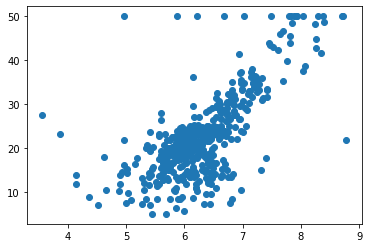

In [34]:
# Use one feature for visualization
x = boston.data[:,5] # 第五个属性

# Get the target vector
y = boston.target

# Scattering plot of prive vs. room number
from matplotlib import pyplot as plt
plt.scatter(x,y)
plt.show()

It can be seen that the samples have some exceptional distributions at the top of the plot. They may be outliers owing to some practical operation during the data input (e.g., convert any price larger than 50 into 50). However, these data are harmful to the model training, and should be removed.

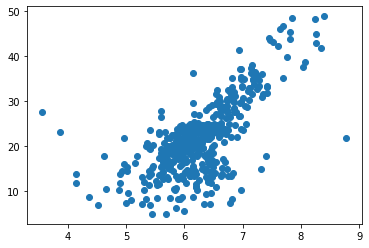

In [46]:
x = x[y<50.0]
y = y[y<50.0]
plt.scatter(x,y)
plt.show()

Now it can be seen that the data is nearly linear, although just in one dimension. Now we use X to denote all attributes

In [47]:
X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]

X.shape

(490, 13)

#### 4.1.3 Split data
 Now we divide the whole dataset into a training set and a test set using the the scikit-learn model_selection module.

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
y_train.shape

(367,)

Usually we also use a validation set. When we use the test set for evaluation, the model will not be changed after the evaluation. However, sometime we want to optimize our model by changing its parameters according to prediction results. The solution is to split a validation set from the training set for adjusting our model. When we believe that the model is good enough, then we evaluate our model on the test set. A more rigorous and costly way is cross validation. With that method, the training set is divided into several pieces in the same size and take every piece as a validation set in turn.

#### 4.1.4 Training 
##### 1) Linear Regression
Now we try to implement a simple linear regression model because the dataset seems linear.

In [49]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

The model has been trained just by using a few lines of codes. Now let’s make a prediction for testing

In [50]:
# Make a prediction
y_0_hat = lin_reg.predict(X_test[0].reshape(1,-1))
print(y_0_hat)
y_test[0]

array([29.73902207])

In [55]:
print(lin_reg.coef_)
lin_reg.intercept_

[-1.15497046e-01  3.16247712e-02 -6.57783276e-02  8.15673015e-01
 -1.29483323e+01  3.81868202e+00 -2.57052332e-02 -1.22854284e+00
  2.50044148e-01 -1.11298627e-02 -8.77857921e-01  7.77084012e-03
 -3.53200828e-01]


32.598144354701375

Use the evaluation method to see if it is a good model. The `score()` method uses R-square.

In [57]:
print(lin_reg.score(X_test, y_test))
from sklearn.model_selection import cross_val_score
cross_val_score(lin_reg, X_train, y_train)

0.790209354602281


array([0.69284465, 0.7571338 , 0.78263295, 0.69231489, 0.79656541])

##### 2) Polynomial Regression
If you have understood the concept of linear regression, you can easily implement polynomial regression. 

#### 4.1.5 Evaluation model
Checking the results on test set。